
## 4) 惩罚线性回归的扩展应用

所谓线性回归的扩展，就是扩展到：分类问题、非线性问题、非数值属性问题等。

### 用惩罚回归求解分类问题

关键点就是将分类标签数值化。

也可以采用**最小角度回归（LARS）**算法解决水雷&岩石问题。 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
df = pd.read_csv(target_url, header=None, prefix='V')
df['V60'] = df.iloc[:,-1].apply(lambda v: 1.0 if v=='M' else 0.0)

In [3]:
norm_df = (df - df.mean())/df.std()
xData = norm_df.values[:,:-1]; yData = norm_df.values[:,-1] 

m, n = xData.shape

V10
V48
V44
V11
V35
V51
V20
V3
V21
V15
V43
V0
V22
V45
V53
V27
V30
V50
V58
V46
V56
V28
V39


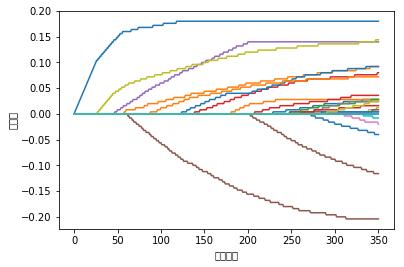

In [4]:
# 回归系数向量\beta初始化
beta = np.zeros(n) 

# 记录历史beta
betaMat = []
betaMat.append(list(beta))

# 迭代步数不长
nSteps = 350
stepSize = 0.004

# 记录属性回归系数变成非零先后次序
nzList = []

for i in range(nSteps):
    # 残差
    residuals = yData - xData.dot(beta)
    
    # 计算属性与残差的相关性
    # 注意: 已标准化，所以此结果和真实相关性仅仅相差一个常数
    corr = residuals.dot(xData)/m
    
    # 找出最大相关性(绝对值)属性
    iStar = np.abs(corr).argmax()
    corrStar = corr[iStar]

    # 更新beta (相关性为正值则增加一点；负值则减少一点)
    beta[iStar] += stepSize * corrStar / abs(corrStar)

    betaMat.append(list(beta))

    # 记录回归系数刚好变成非零的属性
    nzBeta = np.where(beta!=0)[0]
    for q in nzBeta:
        if q not in nzList:
            nzList.append(q)

# 打印属性重要性排序
for idx in nzList:
    print (df.columns[idx])

# 系数曲线
plt.plot(betaMat)
plt.xlabel("迭代步数")
plt.ylabel("系数值")
plt.show()

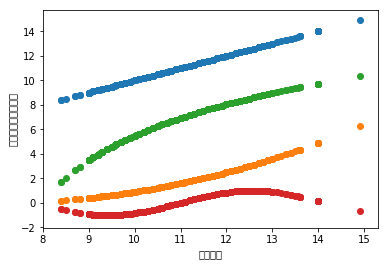

In [7]:
# 获取红酒数据集
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(target_url, header=0, sep=";")
df.columns = ['非挥发性酸','挥发性酸','柠檬酸', '残留糖分', '氯化物', '游离二氧化硫','总二氧化硫', '密度', 
              'PH值', '亚硝酸盐', '酒精含量', '品质']

# 切分属性和标签
xData = df.values[:,:-1]; yData = df.values[:,-1] 

m, n = xData.shape

# 酒精含量基
alch = xData[:, n-1]

# 下面以酒精含量为基，扩展成三个非线性函数基
xExte = np.concatenate((xData,np.zeros((m,3))),axis=1)
xExte[:, n] = (alch - 7)**2 / 10
xExte[:, n+1] = 5* np.log(alch - 7)
xExte[:, n+2] = np.cos(alch)

v1 = list(alch)
for i in range(4):
    v2 = list(xExte[:,n-1+i])
    plt.scatter(v1,v2)
plt.xlabel("酒精含量")
plt.ylabel(("酒精含量的扩展函数"))
plt.show()

### 非数值属性

以鲍鱼性别为例，00表示未定；01表示雌；10表示雄。 每位作为一个属性，于是鲍鱼3性别需要2个属性。 

一般而言，N个值的非数值属性也可以做类似的安排。排成的“二进制形式”，最多只能有一位是1，其它的为零。

以**最小角度回归（LARS）**算法为例。

壳的重量
高度
性别2
去壳重量
直径
性别1


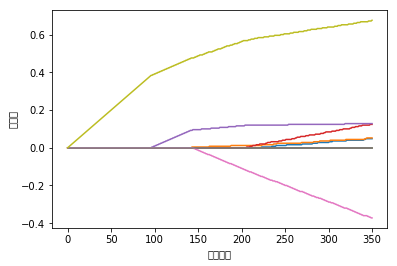

In [9]:
target_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(target_url, header=None, prefix='V')

# 切分属性和标签
xData = df.values[:,:-1]; yData = df.values[:,-1] 
m, n = xData.shape

# 用2列新属性置换1列老属性
sex = xData[:,0]
xData = np.concatenate((np.zeros((m,2)), xData[:,1:]), axis=1)
xData = xData.astype(float); yData = yData.astype(float)
n = n + 1 

# 将老属性值转换成新属性值
for i in range(m):
    if sex[i] == 'M': 
        xData[i,0] = 1.0
    if sex[i] == 'F': 
        xData[i,1] = 1.0

names = ['性别1','性别2','长度','直径','高度','整体重量', '去壳重量', '脏器重量', '壳的重量', '环数']

xData = (xData - xData.mean(axis=0))/np.std(xData,axis=0)
yData = (yData - yData.mean())/np.std(yData)

# 回归系数向量\beta初始化
beta = np.zeros(n) 

# 记录历史beta
betaMat = []
betaMat.append(list(beta))


# 迭代步数步长
nSteps = 350
stepSize = 0.004

# 记录属性回归系数变成非零先后次序
nzList = []

for i in range(nSteps):
    # 残差
    residuals = yData - xData.dot(beta)

    # 计算属性与残差的相关性
    # 注意: 已标准化，所以此结果和真实相关性仅仅相差一个常数
    corr = residuals.dot(xData)/m

    # 找出最大相关性(绝对值)属性
    iStar = np.abs(corr).argmax()
    corrStar = corr[iStar]

    # 更新beta (相关性为正值则增加一点；负值则减少一点)
    beta[iStar] += stepSize * corrStar / abs(corrStar)
    betaMat.append(list(beta))


    # 记录回归系数刚好变成非零的属性
    nzBeta = np.where(beta!=0)[0]
    for q in nzBeta:
        if q not in nzList:
            nzList.append(q)

# 打印属性重要性排序
for idx in nzList:
    print (names[idx])

# 系数曲线
plt.plot(betaMat)
plt.xlabel("迭代步数")
plt.ylabel("系数值")
plt.show()